In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read The image

In [2]:
def ReadImage(image_path):
    try:
        original_image = cv2.imread(image_path)

        if original_image is None:
            raise FileNotFoundError(f"Error: Image not found at '{image_path}'.")

        # Check the shape of the image
        height, width, channels = original_image.shape

        print('Image Height: ', height)
        print('Image Width:  ', width)
        print('Channles:     ', channels)

        # Convert the image to RGB
        original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

        print('Image format:  RGB')

        # Display the original image
        plt.imshow(original_image)
        plt.title('Original Image')
        plt.axis('off')
        plt.show()

        return original_image

    except Exception as e:
        print(f"An error occurred: {str(e)}")

def displayImage(img, text='image'):
    plt.imshow(img)
    plt.title(text)
    plt.axis('off')
    plt.show()

Image Height:  612
Image Width:   518
Channles:      3
Image format:  RGB


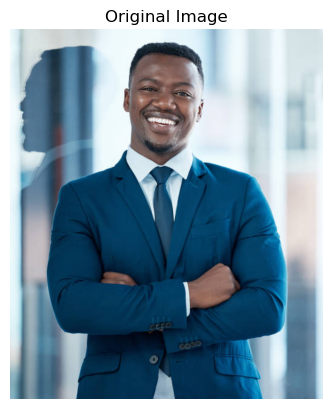

In [13]:
image = ReadImage('abc2.jpg')


In [14]:
# # Importing Required Modules 
# from rembg import remove 
# from PIL import Image 
  
# # Store path of the image in the variable input_path 
# input_path =  'test_image2.jpg' 
  
# # Store path of the output image in the variable output_path 
# output_path = 'no_bag.png' 
  
# # Processing the image 
# input = Image.open(input_path) 
  
# # Removing the background from the given Image 
# output = remove(input) 
  
# #Saving the image in the given path 
# output.save(output_path) 

# Reduce colors

In [14]:
# Function to reduce the number of colors in the image using the K-means clustering algorithm
def change_color_quantization(img, k):
    
    # Read the image and transform it into a NumPy 3D array representing the B (blue), G (green), and R (red) values.
    data = np.float32(img).reshape((-1, 3))

    # Initialize the k-means clustering algorithm and defines its termination criteria. The maximum number of iterations is set to 20.
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)

    # Apply the k-means clustering algorithm. The parameter k specifies the number of distinct colors in the output image.
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # convert centroid to unsigned 8-bit integer.
    center = np.uint8(center)

    # apply centroid values to all pixels by replacing their values with the center value.
    result = center[label.flatten()]

    # reshape the processed result into the shape of the original image.
    result = result.reshape(img.shape)

    # return resultant image
    return result

In [15]:
img = change_color_quantization(image, 10)

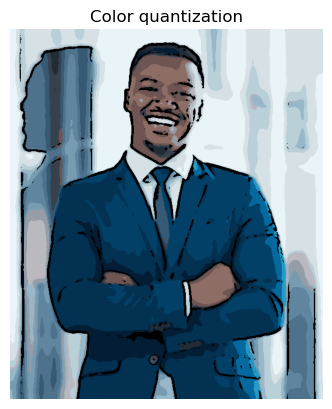

In [38]:
plt.imshow(img)
plt.title("Color quantization")
plt.axis('off')
plt.show()

In [33]:
# Function to add cartoon affect to input image
def cartoonify_img(input_img,value):
   
    # Convert the image to grayscale
    gray_frame = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

    # Apply some median blur to smooth the image
    smooth_gray_frame = cv2.medianBlur(src=gray_frame, ksize=5)

    # plt.imshow(smooth_gray_frame,cmap='gray')
    # plt.axis('off')
    # plt.show()

    # Apply adaptive thresholding to get edges
    smooth_gray_frame_edges = cv2.adaptiveThreshold(src=smooth_gray_frame
                                                    , maxValue=255
                                                    # ADAPTIVE_THRESH_MEAN_C -> Mean of the neighborhood area
                                                    , adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C
                                                    # Type of threshold applied
                                                    , thresholdType=cv2.THRESH_BINARY
                                                    # Size of the neighbourhood area
                                                    , blockSize=9
                                                    # A constant subtracted from the mean of the neighborhood pixels
                                                    , C=9)
    
    # plt.imshow(smooth_gray_frame_edges,cmap='gray')
    # plt.axis('off')
    # plt.show()

    # Plotting the original and grayscale-blurred images side by side
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(input_ima, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Grayscale-Blurred Image
    plt.subplot(1, 2, 2)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Grayscale-Blurred Image')
    plt.axis('off')

    plt.show()

    # Perform erosion
    #smooth_gray_frame_edges = cv2.erode(smooth_gray_frame_edges, kernel, iterations=1)


  
    # Enhance the blur and reduce the sharpness effects of the image.
    filtered_frame = cv2.bilateralFilter(src=input_img
                                         , d=9
                                         # Standard deviation of the filter in color space.
                                         , sigmaColor=200
                                         # Standard deviation of the filter in coordinate space.
                                         , sigmaSpace=200
                                         )
    

    # Combine the edge mask  with the filtered frame
    cartoon_frame = cv2.bitwise_and(filtered_frame, filtered_frame, mask=smooth_gray_frame_edges)

    # Applying color quantization to reduce the number of colors
    cartoon_frame = change_color_quantization(cartoon_frame, value)
    
    return cartoon_frame

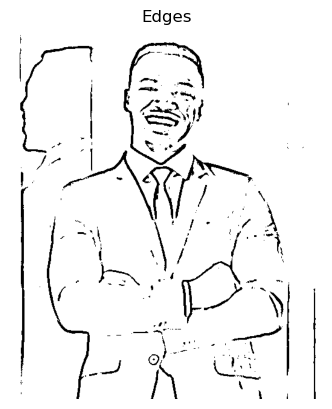

In [34]:
img = cartoonify_img(image,20)

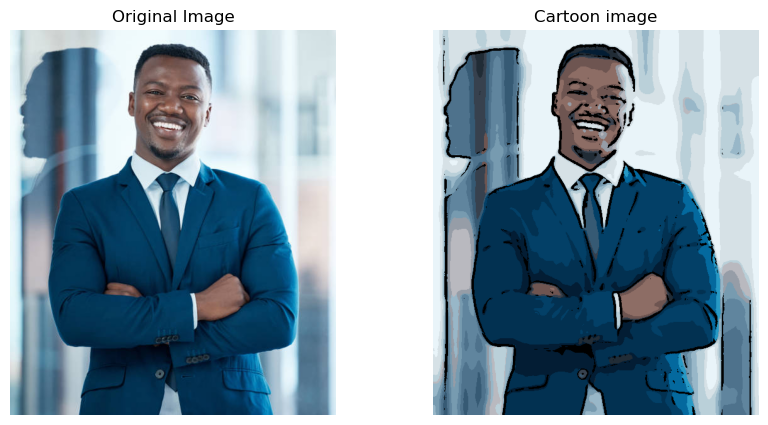

In [40]:
# Plotting the original and grayscale-blurred images side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Grayscale-Blurred Image
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.title('Cartoon image')
plt.axis('off')

plt.show()